In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
from statistics import median
from statistics import mean
import cv2

In [72]:
#row, col = img.shape
def df(img):  # to make a histogram (count distribution frequency)
    values = [0]*256
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            values[img[i,j]]+=1
    return values


def cdf(hist):  # cumulative distribution frequency
    cdf = [0] * len(hist)   #len(hist) is 256
    cdf[0] = hist[0]
    for i in range(1, len(hist)):
        cdf[i]= cdf[i-1]+hist[i]
    # Now we normalize the histogram
    cdf = [ele*255/cdf[-1] for ele in cdf]  
    return cdf

def equalize_image(image):
    img = image
    my_cdf = cdf(df(img))
    # use linear interpolation of cdf to find new pixel values
    import numpy as np
    image_equalized = np.interp(image, range(0,256), my_cdf)
    return image_equalized

#eq = equalize_image(img)

In [88]:
def sec_der_filter(pixelcoor, image2):
    size = [-1,0,1]
    a, b = pixelcoor
    z, w = image2.shape
    out_pixel = 0
    for col in size:
        for row in size:
            if 0 <= a + row < z and 0 <= b + col < w:
                if col or row != 0:
                    out_pixel -= image2[a + row,b + col]
                else:
                    out_pixel += 8 * image2[a + row,b + col]
    return out_pixel
def lap_filter_rgb(image):
    img_rgb = []
    filtereds = []
    for i in range(3):
        img_rgb.append(image[:,:,i])
    filtered_image = np.zeros(list(img_rgb[0].shape))
    x,y = img_rgb[0].shape
    for k in range(3):
        for i in range(x):
            for j in range(y):
                filtered_image[i,j] = sec_der_filter([i,j], img_rgb[k])
        filtereds.append(np.array(filtered_image))
    fil_rgb = np.dstack((filtereds[0],filtereds[1],filtereds[2]))
    fil_rgb = np.array(fil_rgb,dtype = int)
    return(fil_rgb)

In [67]:
def fir_der_filter(pixelcoor, image2):
    size = [-1,0,1]
    a, b = pixelcoor
    z, w = image2.shape
    out_pixel1 = 0
    out_pixel2 = 0
    for col in size:
        for row in size:
            if 0 <= a + row < z and 0 <= b + col < w:
                if row != 0 and col != 0:
                    out_pixel1 += row*(image2[a + row,b + col])
                elif row != 0 and col == 0:
                    out_pixel1 += row*2*(image2[a + row,b + col])
    for col in size:
        for row in size:
            if 0 <= a + row < z and 0 <= b + col < w:
                if col != 0 and row != 0:
                    out_pixel2 += row*(image2[a + row,b + col])
                elif col != 0 and row == 0:
                    out_pixel2 += col*2*(image2[a + row,b + col])    
                    
    out_pixel = abs(out_pixel1) + abs(out_pixel2)
    
    return out_pixel
def grad_filter_rgb(image):
    img_rgb = []
    filtereds = []
    for i in range(3):
        img_rgb.append(image[:,:,i])
    filtered_image = np.zeros(list(img_rgb[0].shape))
    x,y = img_rgb[0].shape
    for k in range(3):
        for i in range(x):
            for j in range(y):
                filtered_image[i,j] = fir_der_filter([i,j], img_rgb[k])
        filtereds.append(np.array(filtered_image))
    fil_rgb = np.dstack((filtereds[0],filtereds[1],filtereds[2]))
    fil_rgb = np.array(fil_rgb,dtype = int)
    return(fil_rgb)

In [80]:
def rgb_pix_med_filter(pixelcoor, image2, filtershape):
    size = list(range(-filtershape//2+1,filtershape//2+1))
    a, b = pixelcoor
    z, w = image2.shape
    neigh_pixs = []
    for col in size:
        for row in size:
            if 0 <= a + row < z and 0 <= b + col < w:
                neigh_pixs.append(image2[a+row,b+col])
    out_pixel = median(neigh_pixs)
    return out_pixel
def med_filter_rgb(image,filtersize):
    img_rgb = []
    filtereds = []
    for i in range(3):
        img_rgb.append(image[:,:,i])
    filtered_image = np.zeros(list(img_rgb[0].shape))
    x,y = img_rgb[0].shape
    for k in range(3):
        for i in range(x):
            for j in range(y):
                filtered_image[i,j] = rgb_pix_med_filter([i,j], img_rgb[k],filtersize)
        filtereds.append(np.array(filtered_image))
    fil_rgb = np.dstack((filtereds[0],filtereds[1],filtereds[2]))
    fil_rgb = np.array(fil_rgb,dtype = int)
    return fil_rgb,filtersize

In [128]:
def rgb_pix_min_filter(pixelcoor, image2, filtershape):
    size = list(range(-filtershape//2+1,filtershape//2+1))
    a, b = pixelcoor
    z, w = image2.shape
    neigh_pixs = []
    for col in size:
        for row in size:
            if 0 <= a + row < z and 0 <= b + col < w:
                neigh_pixs.append(image2[a+row,b+col])
    out_pixel = min(neigh_pixs)
    return out_pixel
def min_filter_rgb(image,filtersize):
    img_rgb = []
    filtereds = []
    for i in range(3):
        img_rgb.append(image[:,:,i])
    filtered_image = np.zeros(list(img_rgb[0].shape))
    x,y = img_rgb[0].shape
    for k in range(3):
        for i in range(x):
            for j in range(y):
                filtered_image[i,j] = rgb_pix_med_filter([i,j], img_rgb[k],filtersize)
        filtereds.append(np.array(filtered_image))
    fil_rgb = np.dstack((filtereds[0],filtereds[1],filtereds[2]))
    fil_rgb = np.array(fil_rgb,dtype = int)
    return fil_rgb,filtersize

# First Image:

In [77]:
loc = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW2/inputs/P3/III/stars_1.jpg'
im = Image.open(loc)
img = np.array(im)

In [97]:
med_img, s = med_filter_rgb(img,11)

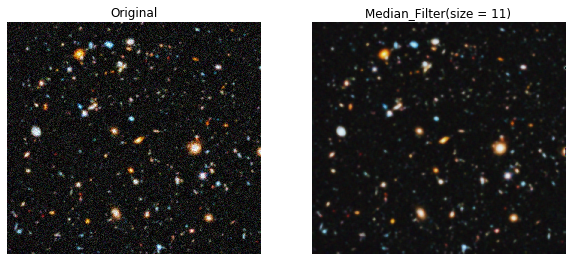

In [109]:
matplotlib.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(img,'gray')
plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(med_img)
plt.title('Median_Filter(size = {})'.format(s))
plt.axis('off')
plt.show()

In [99]:
grad_img = grad_filter_rgb(med_img)

In [ ]:
lap_img = lap_filter_rgb(med_img)

In [104]:
lap_output = lap_img + med_img
grad_output = grad_img + med_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


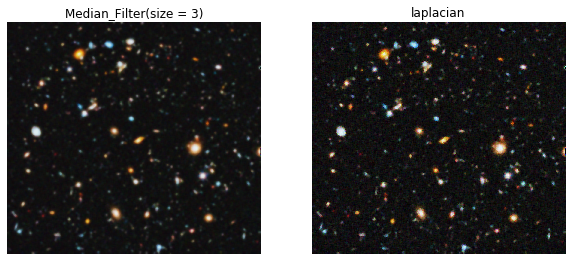

In [215]:
matplotlib.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(med_img)
plt.title('Median_Filter(size = {})'.format(s))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(lap_output)
plt.title('laplacian')
plt.axis('off')
plt.show()

# Second Image: 

In [114]:
loc2 = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW2/inputs/P3/III/stars_2.jpg'
im2 = Image.open(loc2)
img2 = np.array(im2)

In [120]:
med_img2, s2 = med_filter_rgb(img2,7)

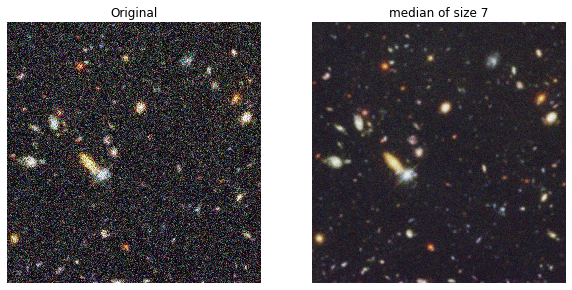

In [207]:
matplotlib.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(img2,'gray')
plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(med_img2)
plt.title('median of size 7')
plt.axis('off')
plt.show()

In [212]:
power_img = med_img2**1.5

In [213]:
power_img = ((power_img-np.min(power_img))/(np.max(power_img)))*256

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


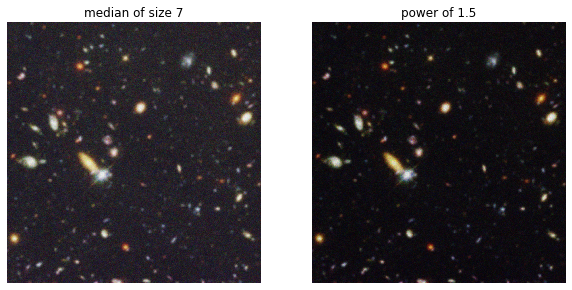

In [214]:
power_img = np.array(power_img,dtype = int)
matplotlib.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(med_img2)
plt.title('median of size 7')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(power_img)
plt.title('power of 1.5')
plt.axis('off')
plt.show()

# Third Image: 

In [286]:
loc3 = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW2/inputs/P3/III/stars_3.jpg'
im3 = Image.open(loc3)
img3 = np.array(im3)

In [287]:
power_img3 = (img3)**1.9

In [288]:
power_img3 = ((power_img3-np.min(power_img3))/(np.max(power_img3)))*256

In [289]:
power_img3 = np.array(power_img3,dtype = int)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


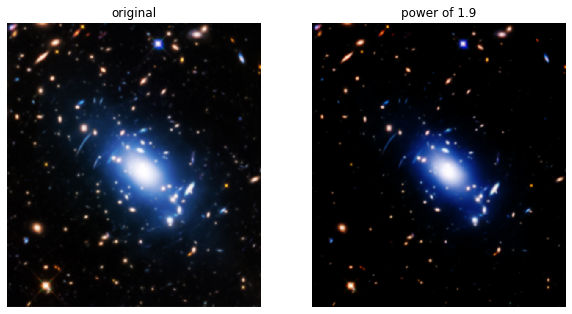

In [293]:
power_img4 = np.array(power_img4,dtype = int)
matplotlib.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(img3)
plt.title('original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(power_img3)
plt.title('power of 1.9')
plt.axis('off')
plt.show()

# Fourth Image: 

In [216]:
loc4 = 'C:/Users/sherw/OneDrive/Desktop/DIP_HW2/inputs/P3/III/stars_4.jpg'
im4 = Image.open(loc4)
img4 = np.array(im4)

In [217]:
med_img4, s4 = med_filter_rgb(img4,7)

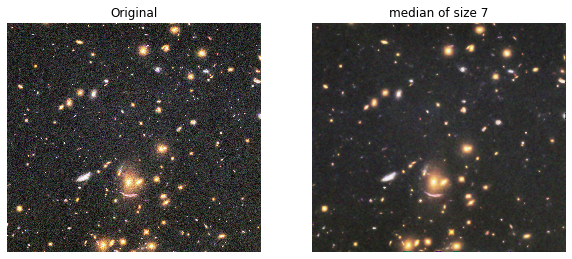

In [218]:
matplotlib.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(img4,'gray')
plt.title('Original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(med_img4)
plt.title('median of size 7')
plt.axis('off')
plt.show()

In [222]:
power_img4 = med_img4**1.5

In [223]:
power_img4 = ((power_img4-np.min(power_img4))/(np.max(power_img4)))*256

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


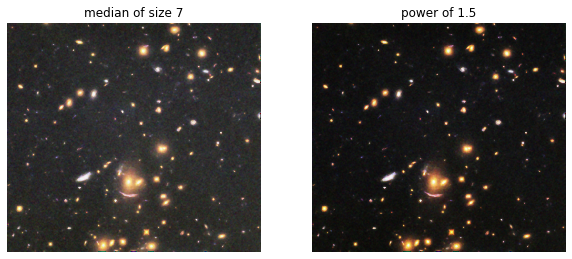

In [224]:
power_img4 = np.array(power_img4,dtype = int)
matplotlib.rcParams['figure.figsize'] = [10,10]
plt.subplot(1,2,1)
plt.imshow(med_img4)
plt.title('median of size 7')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(power_img4)
plt.title('power of 1.5')
plt.axis('off')
plt.show()